# Regression

# Introduction

Predict the estimated time of arrival (ETA) for motorbike deliveries in Nairobi

## Importing the libraries

In [24]:
import numpy as np #Why?
import pandas as pd #Why?
import matplotlib.pyplot as plt #Why?
from matplotlib import rc #Why?
import seaborn as sns

## Importing the dataset

In [26]:
train = pd.read_csv('Train.csv')

In [27]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [29]:
test = pd.read_csv('Test.csv')

In [30]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [31]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
Order No                                7068 non-null object
User Id                                 7068 non-null object
Vehicle Type                            7068 non-null object
Platform Type                           7068 non-null int64
Personal or Business                    7068 non-null object
Placement - Day of Month                7068 non-null int64
Placement - Weekday (Mo = 1)            7068 non-null int64
Placement - Time                        7068 non-null object
Confirmation - Day of Month             7068 non-null int64
Confirmation - Weekday (Mo = 1)         7068 non-null int64
Confirmation - Time                     7068 non-null object
Arrival at Pickup - Day of Month        7068 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null int64
Arrival at Pickup - Time                7068 non-null object
Pickup - Day of Month                   7068 n

In [33]:
#Fill null values with 0, axis=1 means you are doing it per column, axis=0 means you are doing it per row

ftrain = train.fillna(0, axis=1)
ftest = test.fillna(0, axis=1)

In [34]:
#drop most of the object dtype columns

# Exploritory Data Analysis

In [37]:
#The columns in test and train do not match 100% lets fix that
testcols = ftest.columns  #getting a list of the columns in test set
newtrain = ftrain[testcols]  #redefining the training set to only include those columns
y = np.array(ftrain['Time from Pickup to Arrival']).reshape(-1, 1) #assigning the target variable

In [38]:
print(newtrain.columns)
print(ftest.columns)

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at 

In [39]:
#Combining the datasets 
df = pd.concat([newtrain, ftest])
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,5,10:27:30 AM,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,5,11:44:09 AM,16,26.4,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,2,12:53:03 PM,3,0.0,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,5,9:43:06 AM,9,19.2,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,1,10:05:23 AM,9,15.4,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770


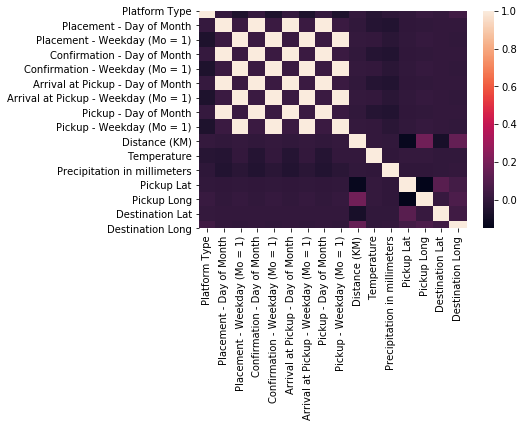

In [40]:
#machine learning model cannot read an object type, convert objects , encode (dummy them)
correlation = df.corr()
sns.heatmap(correlation)

In [ ]:
#drop all co-linear variables as well time variables as they will cause us to run into memory problems
#df = df.drop(['Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday', 'Arrival at Pick up Day of Month', 'Arrival at pickup weekday', 'pick up day of month', 'pickup weekday', 'placement time', 'confirmation time', 'arrival at pickup time', 'pickup time'], axis = 1)

In [ ]:
#df_final = df.drop(['order no(Too variant, not adding value to model)', 'user id(Too variant, not adding value to model)', 'vehicle type(only a single value, pointless)', 'rider id()'], axis=1) #dropping IDs
#df_final.head()

In [42]:
#Dummying out the last categorical column
#df_final = pd.get_dummies(df)
#df_final.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),...,Rider Id_Rider_Id_954,Rider Id_Rider_Id_955,Rider Id_Rider_Id_956,Rider Id_Rider_Id_957,Rider Id_Rider_Id_958,Rider Id_Rider_Id_959,Rider Id_Rider_Id_96,Rider Id_Rider_Id_97,Rider Id_Rider_Id_98,Rider Id_Rider_Id_99
0,3,9,5,9,5,9,5,9,5,4,...,0,0,0,0,0,0,0,0,0,0
1,3,12,5,12,5,12,5,12,5,16,...,0,0,0,0,0,0,0,0,0,0
2,3,30,2,30,2,30,2,30,2,3,...,0,0,0,0,0,0,0,0,0,0
3,3,15,5,15,5,15,5,15,5,9,...,0,0,0,0,0,0,0,0,0,0
4,1,13,1,13,1,13,1,13,1,9,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#splitting our dataset again
y = np.array(ftrain['Time from Pickup to Arrival']).reshape(-1, 1)
finaltrain = df_final[:len(train)]
finaltest = df_final[len(train)]

KeyError: 21201

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(finaltrain, y, test_size=0.3)

In [ ]:
#define our model, training and making predictions on the validation set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
val_preds = lr.predict(x_val)

In [ ]:
#Checking the RMSE of our validation predictions
#def rmse(y_test, y_predict):
    #return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
#rmse(y_val, val_preds)

In [ ]:
#making predictions on the test set and sending the result to csv for submission
#y_pred = lr.predict(finaltest) #retraining model - no need to do this

In [ ]:
submission_df = ftest[['Order_No']] - renaming the dataset, use identifyer
submission_df['Time from Pickup to arrival'] = y_pred

In [ ]:
print(submission_df)

In [ ]:
#send df to csv
submission_df.to_csv('base prediction', index=false)

In [10]:
##Create a few plots for the data

In [ ]:
#Advanced plotting? plot both dependent data series on the same graph, assign two separate y-axxes

# Data Cleaning and Formatting 

## Splitting the dataset into the Training set and Test set

In [1]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

NameError: name 'x' is not defined

## Training the Simple Linear Regression model on the Training set

In [ ]:
#Find the best fit line = y=a + bx, estimate a and b
#define a function to generate values of y from a list of x given a and b
# calculate the error of each generated value of y e = y - f(x) errors = np.array(df.Y - y_gen)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(x_test)

## Visualising the Training set results

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(y_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()